# Modellanpassung

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
5.2 Regression | Methode der kleinsten Quadrate (Statistik Grundlagen)

<iframe width="200" height="113" src="https://www.youtube.com/embed/lQU2tBGOgzo?si=tOTZxzwBWsZj8tsA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

Bisher haben wir uns auf die Analyse von Messreihen konzentriert, bei denen einzelne Messwerte betrachtet wurden, um Mittelwerte und Standardabweichungen zu berechnen. Im letzten Kapitel haben wir jedoch bereits gesehen, dass es Situationen gibt, in denen verschiedene Messgrößen gemessen werden und diese unter Umständen eine Abhängigkeit oder Korrelation untereinander aufweisen können.

Dies bedeutet beispielsweise, dass wir eine Messgröße y haben, die eine Funktion einer anderen Messgröße x ist:

$$y = f(x)$$

Grundsätzlich ist jeder funktionale Zusammenhang $f(x)$ möglich. Es kann jedoch auch vorkommen, dass der Zusammenhang linear ist. In jedem Fall sollte der Typ der Fit-Funktion $y = f(x)$ im Voraus festgelegt und begründet werden. Es ist keine wissenschaftliche oder messtechnische Vorgehensweise, alle möglichen Funktionen ohne klaren Grund auszuprobieren und sich dann für die besten zu entscheiden. Dies könnte zu unbrauchbaren Näherungen oder sogar zu falschen und nicht wissenschaftlichen Ergebnissen führen, was vermieden werden sollte.

Wenn wir Messungen von y für verschiedene Werte von x durchführen, erhalten wir verschiedene Punkte im Messbereich. Die Werte werden wahrscheinlich um eine Gerade streuen, das heißt, sie liegen nicht perfekt auf einer Geraden. Dies liegt einfach daran, dass es zufällige Fehler gibt.

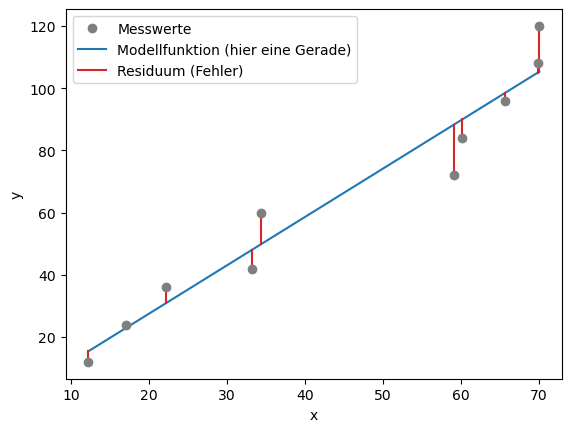

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import interpolate

y = [12, 24, 36, 42, 60, 72, 84, 96, 108, 120] 
x = [12.2, 17, 22.1, 33.2, 34.4, 59.1, 60.2, 65.7, 69.9, 70.1] 

y = np.array(y) #konvertiere die Messwerte in ein Numpy-Array
x = np.array(x) #konvertiere die Messwerte in ein Numpy-Array

plt.plot(x,y,'o', color='tab:gray', zorder=3)

# Anpassung / Fit:
def anpassung(x, a, b):
    return a + b*x

popt, pcov = curve_fit(anpassung, x, y)
plt.plot(x,anpassung(x,*popt), zorder=0, color = 'tab:blue')
plt.plot((x,x),([i for i in y], [j for (j) in anpassung(x,*popt)]),c='tab:red', zorder=1)
plt.xlabel('x')
plt.ylabel('y')
#plt.xticks([])
#plt.yticks([])
plt.legend(['Messwerte', 'Modellfunktion (hier eine Gerade)', 'Residuum (Fehler)'])
plt.show()

Um die optimale Gerade zu bestimmen, führen wir eine **lineare Regression** durch, um die Daten anzunähern. Die optimale Gerade hat im Idealfall die Form:

$$y = a + b \cdot x + E$$

Hierbei ist $b$ die Steigung der Geraden, $a$ der Achsenabschnitt und $E$ der Fehler, der durch den Abstand der Geraden von den Messpunkten entsteht.

Wie bestimmen wir diese Gerade? Kurz gesagt, suchen wir ein geeignetes Modell für unsere Daten und möchten die Modellparameter ermitteln. Das Modell soll möglichst gut die Messdaten vorhersagen. Die Anpassung des Modells erfolgt häufig mithilfe der Methode der kleinsten Quadrate, die sich für die Modellierung von nahezu allen Arten von Messdaten eignet.


:::{admonition} Tutorial
:class: tip
Python-Beispiele für Kurvenanpassungen findet ihr hier:
* [Vergleich verschiedener Fit-Routinen](T_LinReg)
* [Regression mit Fehlerbalken](T_FitmitFehlerbalken)
* [Klimadaten anpassen](T_Plotten)
:::

## Least-Squares: Methode der kleinsten Quadrate

Unser Ziel ist es, die Abweichung der Messwerte von der Geraden (oder allgemein von der Funktion $f$) so gering wie möglich zu halten. Wie bereits beim Berechnen von Mittelwerten und Standardabweichungen verwenden wir die Quadrate der Abweichungen. Dadurch werden positive und negative Abweichungen nicht ausgeglichen, und größere Abweichungen werden stärker (quadratisch) gewichtet.

Hierfür definieren wir die Funktion $Q$, die von den Geradenparametern $b$ und $a$ abhängt und als **Gütefunktion** definiert ist:

$$Q(b,a) = \sum_{i = 1}^N [y_i - (b\cdot x_i + a)]^2 = \mathrm{min !}$$

In dieser Funktion werden zunächst die Unterschiede zwischen den Messwerten und der theoretischen Geradenfunktion berechnet. Diese Differenzen werden dann quadriert und schließlich für alle Messwerte $y_i$ aufsummiert. Unser Ziel ist es, diese Summe zu minimieren.
Es handelt sich um ein *Minimierungsproblem*, das je nach Art der Modellfunktion unterschiedlich gelöst wird. Im Folgenden werden wir es für eine lineare Funktion lösen.

```{warning}
Besitzen die $N$ Messwerte $y_i$ jeweils unterschiedliche Unsicherheiten $s_i$, so werden diese in die Gütefunktion miteinbezogen und verursachen eine Art Gewichtung. Damit geht $Q$ über in $\chi^2$:
$$
\chi^2 = \sum_{i=1}^n \frac{(y_i - f(x_i))^2}{\sigma_i^2}
$$
Wenn alle Werte von $y_i$ die gleiche absolute (oder keine) Unsicherheit haben, ist $s_i = s = \mathrm{const}$ und beim "Nullsetzen" werden diese einfach eliminiert und man kann, wie im Folgenden gezeigt $Q$ benutzen.
```

Um die Parameter $a$ und $b$ zu minimieren, leiten wir die Funktion $Q$ nach diesen Parametern ab und setzen die Ableitungen gleich Null, um die Extremstellen (in diesem Fall das Minimum) zu finden. Wir leiten $Q$ also nach $b$ und $a$ ab:

$$\frac{dQ}{db} = -2 \sum_{i = 1}^{N} x_i (y_i - bx_i - a) = 0$$

$$\frac{dQ}{da} = -2 \sum_{i = 1}^{N} (y_i - bx_i - a) = 0$$

Durch Differentiation nach den Parametern und Gleichsetzen der Ableitungen auf Null erhalten wir die folgenden Gleichungen:

$$b\sum_{i = 1}^{N} x_i^2 + a\sum_{i = 1}^{N}x_i  = \sum_{i = 1}^{N}x_i y_i$$

$$b\sum_{i = 1}^{N} x_i + N a  = \sum_{i = 1}^{N} y_i$$

## Modellparameter

Durch Umstellen dieser Gleichungen erhalten wir die folgenden Ausdrücke für die gesuchten besten Schätzwerte der Regressionsgeraden, auch **Regressionskoeffizienten pder Modellparameter** genannt:

$$ b = \frac{\sum_{i=1}^N (x_i y_i) - n\sum_{i=1}^N x_i }{\sum_{i=1}^N x_i^2 } = \frac{\mathrm{cov}_{xy}}{s_{x}^2} = \frac{\overline{x\cdot y} - \overline x \cdot \overline y}{\overline{x^2} - (\overline x)^2}$$

$$a = \frac{\sum_{i=1}^N y_i - b \sum_{i=1}^N x_i}{N} = \bar y - b \cdot \bar x$$

Hierbei bedeuten $\bar x$ und $\bar y$ die Durchschnittswerte der jeweiligen Messwerte:

$$\bar x = \frac{1}{N}\sum_{i = 1}^N x_i$$

$$\bar y = \frac{1}{N}\sum_{i = 1}^N y_i$$

und die Kovarianz $\mathrm{cov}_{xy}$ und die Standardabweichung $s_{x}$ der Messwerte sind:

$$\mathrm{cov}_{xy} = \frac{1}{N-1}\sum_{i = 1}^N (x_i-\bar x)(y_i - \bar y)$$

$$s_{x}^2 = \frac{1}{N-1}\sum_{i = 1}^N (x_i-\bar x)^2$$

Es ist wichtig anzumerken, dass wir hier die Mittelwerte für $x$ und $y$ verwenden, obwohl die $x$-Werte absichtlich während der Versuchsreihe variiert werden, wodurch sich die Größen $x$ und $y$ kontinuierlich ändern. Dies ist eine besondere Eigenschaft der Methode der kleinsten Quadrate in der linearen Regression.

Mittels diesen Gleichungen können wir für das oben gezeigte Beispiel der Messdaten die Parameter $a$ und $b$ manuell berechnen:

In [114]:
# Erstellen der DataFrames
data = pd.DataFrame({'x': x, 'y': y})

# Berechnung der Regressionskoeffizienten
x_mean = data['x'].mean()
y_mean = data['y'].mean()
xy_mean = (data['x'] * data['y']).mean()
x_squared_mean = (data['x']**2).mean()

b = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean**2)
a = y_mean - b * x_mean

print("Regressionskoeffizient b (Geraden-Steigung):", b)
print("Regressionskoeffizient a (Ordinatenabschnitt):", a)

# Berechnung der Gütefunktion
data['b*x+a'] = b * data['x'] + a
data['y-(b*x+a)'] = data['y'] - data['b*x+a']
data['[y-(b*x+a)]^2'] = data['y-(b*x+a)']**2
sum_of_squared_residuals = data['[y-(b*x+a)]^2'].sum()



Regressionskoeffizient b (Geraden-Steigung): 1.5521057004878616
Regressionskoeffizient a (Ordinatenabschnitt): -3.4979720446561657


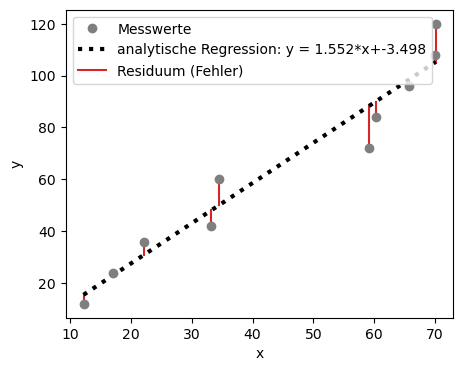

In [115]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10; # Schriftgröße

plt.figure(figsize=(5,4)) # Plot-Größe
plt.plot(x,y,'o', color='tab:gray', zorder=3)
plt.plot(x,b*x+a,lw=3, color="black", ls = ':')  # plot Ausgleichsgerade mit m und b
plt.plot((x,x),([i for i in y], [j for (j) in anpassung(x,*popt)]),c='tab:red', zorder=1)
plt.xlabel('x')
plt.ylabel('y')
#plt.xticks([])
#plt.yticks([])
plt.legend(['Messwerte', 'analytische Regression: y = %5.3f*x+%5.3f'%(b,a), 'Residuum (Fehler)'])
plt.show()

Die Regressionskoeffizienten ermöglichen uns, die Gerade zu bestimmen. In der Praxis verwendet man jedoch in der Regel nicht diese komplexen Berechnungen, sondern greift auf Funktionen zurück, die bereits in vielen Programmen vorimplementiert sind. Ein Beispiel hierfür ist die in Python vorhandene Funktion `curve_fit`. Wie das folgende Beispiel zeigt, führen sowohl die manuelle Berechnung von $b$ und $a$ als auch die Verwendung der integrierten Python-Funktion zu derselben Regressionsgeraden.

Die Modellparameter und Unsicherheiten lassen sich in Python direkt durch die Fit-Funktion speichern: `popt, pcov = curve_fit(anpassung, x, y)`. 
- `popt` enthält die Parameterwerte (z. B. Steigung, Achsenabschnitt). Hier ist $a$ in `popt[0]` gespeichert und $b$ in `popt[1]`.
- `pcov` ist die Kovarianzmatrix der Parameter und enthält die Varianzen der Modellparameter (Quadrierten Unsicherheiten). 

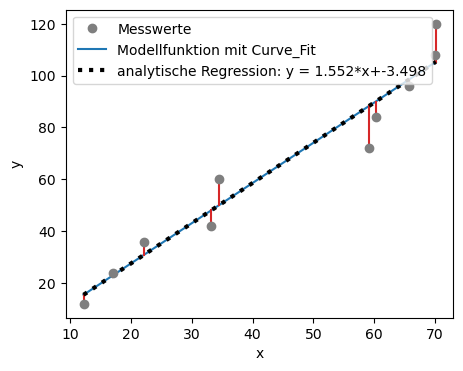

In [116]:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10; # Schriftgröße
plt.figure(figsize=(5,4)) # Plot-Größe


# Modellfunktion / Fit:
def anpassung(x, a, b):
    return a + b*x

# Funktion an die Messwerte anpassen:
popt, pcov = curve_fit(anpassung, x, y)


plt.plot(x,y,'o', color='tab:gray', zorder=3, label = 'Messwerte')
plt.plot(x,anpassung(x,*popt), zorder=0, color = 'tab:blue', label = 'Modellfunktion mit Curve_Fit')
plt.plot(x,b*x+a,lw=3, color="black", ls = ':', label = 'analytische Regression: y = %5.3f*x+%5.3f' %(b,a))  # plot Ausgleichsgerade mit m und b
plt.plot((x,x),([i for i in y], [j for (j) in anpassung(x,*popt)]),c='tab:red', zorder=1)
plt.xlabel('x')
plt.ylabel('y')
#plt.xticks([])
#plt.yticks([])
plt.legend()
plt.show()


In [117]:
print('Modellparameter a: ', popt[0])
print('Modellparameter b: ', popt[1])

print('Die Kovarianzmatrix der Parameter ist:\n', pcov)

Modellparameter a:  -3.497972129641658
Modellparameter b:  1.5521057031743566
Die Kovarianzmatrix der Parameter ist:
 [[ 4.56630726e+01 -8.29194564e-01]
 [-8.29194564e-01  1.86797595e-02]]


## Wie gut passt ein Modell? Residuenanalyse!

Um die Anpassung von Modellen an Messdaten zu bewerten, verwendet man verschiedene Kenngrößen.  
Im Folgenden sind die wichtigsten Größen zusammengefasst, jeweils mit englischer Bezeichnung (gebräuchlich in der Literatur) und deutscher Entsprechung:


### Residuen

**Residuen** sind definiert als die Differenz zwischen den gemessenen Werten und den durch das Modell vorhergesagten Werten:

$$
\varepsilon_i = y_i - f(x_i)
$$

$y_i$ sind die gemessenen Werte sind und $f(x_i)$ die Modellwerte. 

- Wenn das Modell korrekt ist und die Unsicherheiten realistisch abgeschätzt wurden, sollten die Residuen zufällig um 0 verteilt sein.  
- **Systematische Strukturen** in den Residuen (z. B. Trends oder gekrümmte Muster) deuten darauf hin, dass das Modell die Daten nicht angemessen beschreibt.  
- Residuenplots sind daher ein wichtiges Diagnosewerkzeug bei der Datenanalyse.

### Residuensumme 
Die **Residuensumme** (Sum of Squared Residuals, SSR oder auf deutsch Summe der Quadrierten Residuen, SQR) misst die Gesamtabweichung des Modells von den Daten:

$$
  SSR = \sum_{i=1}^N \varepsilon_i^2
$$

Je kleiner die SSR, desto enger liegen die Modellwerte an den Werten. 


Summe der quadrierten Residuen (SSR): 	 708.4098032924456
Mittelwert der Residuen: 		 -3.426803445449877e-08


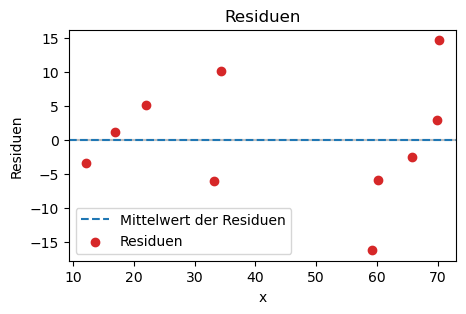

In [92]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10; # Schriftgröße
plt.figure(figsize=(5,3)) # Plot-Größe

# Residuen berechnen
residuals = y - anpassung(x, *popt)

# SSR berechnen:
SSR = 0
for r in residuals:
    SSR += r**2

print("Summe der quadrierten Residuen (SSR): \t", SSR)
print("Mittelwert der Residuen: \t\t", np.mean(residuals))

# Residuenplot
plt.axhline(0, color="tab:gray", linestyle="-", alpha = 0.5)
plt.axhline(np.mean(residuals), color="tab:blue", linestyle="--", label = 'Mittelwert der Residuen')
plt.scatter(x, residuals, color = 'tab:red', label = 'Residuen')
plt.legend()
plt.xlabel("x")
plt.ylabel("Residuen")
plt.title("Residuen")
plt.show()

### Standardfehler der Residuen (RMSE)

Als ein Maß für die **Qualität der Regression** kann der geschätzte Standardfehler der Residuen (engl. *residual standard error* bzw. Root Mean Square Error, RMSE) genommen werden. 
Er beschreibt, wie stark die Messwerte im Durchschnitt von der Regressionsgeraden abweichen und normiert die Streuung der Residuen unter Berücksichtigung der Freiheitsgerade $\nu = N-k$:

$$
s_y = \sqrt{\frac{1}{N-2}\sum_{i=1}^n {\varepsilon}_i^2} = \sqrt{\frac{SSR}{N-k}} = RMSE
$$

mit  
- ${\varepsilon}_i$: Residuen  
- $\nu = N-k$: Freiheitsgrade, wobei $k$ die Anzahl der Modellparameter sind. Bei einer linearen Regression mit $a, b$ als Parameter ist $k=2$. 
- SSR: Sume of Squared Residuals (bzw. SQR: Quadratsumme der Residuen)

Der Standardfehler der Residuen ist ein **eigenständiges Gütemaß**. Er gibt an, wie groß im Durchschnitt die Abweichung der Messwerte von der Regressionsgerade ausfällt. Je größer der Standardfehler der Regression, desto schlechter beschreibt die Regressionsgerade die Verteilung der Messwerte. RMSE erlaubt den direkten Vergleich zwischen Datensätzen unterschiedlicher Länge oder Modellen mit unterschiedlicher Parameterzahl.

```{warning}
Hierbei handelt es sich nicht um die *klassische* Standardabweichung der Residuen, da durch die Anzahl der Freiheitsgerade $N-k$ geteilt wird. Bei der arithmetischen Standardabweichung dividiert man durch $N$, bei der empirischen Standardabweichung durch $N-1$. D.h. nur für die Spezialfälle $k=0$ bzw. $k=1$ ist der Standardfehler der Residuan gleich der arithmetischen bzw. empirischen Standardabweichung. 
```

Aus dem Standardfehler der Residuen (RMSE) lassen sich Fehlergrenzen und **Vertrauensintervalle** ableiten.  
Unter der Annahme einer Normalverteilung gilt:

* Etwa **68 %** aller Residuen liegen innerhalb von $\pm 1 \times RMSE$.  
* Etwa **95 %** aller Residuen liegen innerhalb von $\pm 2 \times RMSE$.  
* Etwa **99,7 %** aller Residuen liegen innerhalb von $\pm 3 \times RMSE$.  

Standardfehler des Residuen RMSE: 	 +- 9.410166067161393
Standardabweichung der Residuen: 	 +- 8.416708402293889


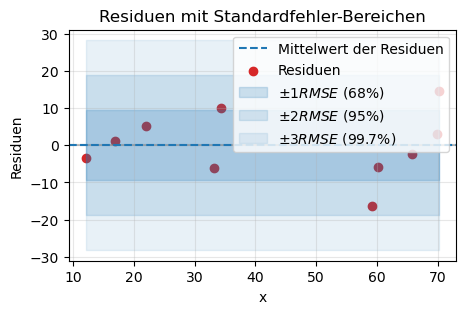

In [93]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10
plt.figure(figsize=(5,3)) # Plot-Größe

# Standardfehler der Schätzung
sy = np.sqrt(SSR/(len(y)-2)) 

print('Standardfehler des Residuen RMSE: \t +-', sy)
print("Standardabweichung der Residuen: \t +-", np.std(residuals))

# Residuenplot
plt.axhline(0, color="tab:gray", linestyle="-", alpha = 0.5)
plt.axhline(np.mean(residuals), color="tab:blue", linestyle="--", label = 'Mittelwert der Residuen')
plt.scatter(x, residuals, color='tab:red', label="Residuen")
# Konfidenzbereiche als Flächen
plt.fill_between(x, -sy, sy, color='tab:blue', alpha=0.2, label=r'$\pm 1 RMSE$ (68%)')
plt.fill_between(x, -2*sy, 2*sy, color='tab:blue', alpha=0.15, label=r'$\pm 2 RMSE$ (95%)')
plt.fill_between(x, -3*sy, 3*sy, color='tab:blue', alpha=0.1, label=r'$\pm 3 RMSE$ (99.7%)')

# Achsenbeschriftungen und Titel
plt.xlabel("x")
plt.ylabel("Residuen")
plt.title("Residuen mit Standardfehler-Bereichen")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.show()

### Chi²-Quadrat-Anpassungstest

Der Chi²-Quadrat-Anpassungstest bewertet die Anpassung, wenn die Unsicherheiten der Daten $s_i$ bekannt sind.  

$$\chi^2 = \sum_{i=1}^N \left(\frac{f(x_i)-y_i}{s_i}\right)^2 = \sum_{i=1}^N \left(\frac{\varepsilon_i}{s_i}\right)^2$$

Zur Beurteilung eines Modells wird das **reduzierte Chi²** verwendet:

$$
\chi^2_\nu = \frac{\chi^2}{N-k}
$$

für welches Chi² durch die Anzahl der Freiheitsgerade $\nu$ geteilgt wird. $k$ ist wieder die Anzahl der Modellparameter und $N$ die Anzahl der Messwerte. Für die lineare Regression, mit zwei Modellparametern $b$ and $a$, ist $k = 2$.

Der Chi²-Quadrat-Anpassungstest ermöglicht es, die Anpassungsgüte eines vermuteten funktionalen Zusammenhangs (z. B. Abhängigkeit einer Messgröße von Zeit, Temperatur oder Druck) an empirische Messpunkte zu bewerten.

Praktisch bedeutet das:
* Man prüft, ob ein gewähltes Modell (etwa eine Gerade) die Daten hinreichend beschreibt oder ob ein komplexeres Modell (z. B. Parabel, logarithmischer Zusammenhang) notwendig ist.
* Dazu vergleicht man die berechneten $\chi^2$-Werte verschiedener Modelle. Das Modell mit dem kleinsten normierten $\chi^2$ (reduzierten $\chi^2$) liefert die beste Erklärung der Daten.

    - $\chi^2_\nu \approx 1$: Modell passt zu den Daten, Unsicherheiten sind realistisch.  
    - $\chi^2_\nu \gg 1$: Modell passt schlecht oder Unsicherheiten unterschätzt (zu klein).  
    - $\chi^2_\nu \ll 1$: Unsicherheiten überschätzt (zu groß) oder Daten überangepasst.  

Darüber hinaus erlaubt dieser Test wieder, auf Basis der empirisch bestimmten Varianz, Vertrauensintervalle für die (unbekannte) Varianz der Grundgesamtheit abzuschätzen. Damit lässt sich mit einer vorgegebenen Wahrscheinlichkeit der Bereich angeben, in dem der wahre Wert der Varianz liegt.

Standardfehler des Residuen RMSE: 	 +- 9.410166067161393
Standardabweichung der Residuen: 	 +- 8.416708402293889
Chi²: 5.66, Chi²_red: 0.707


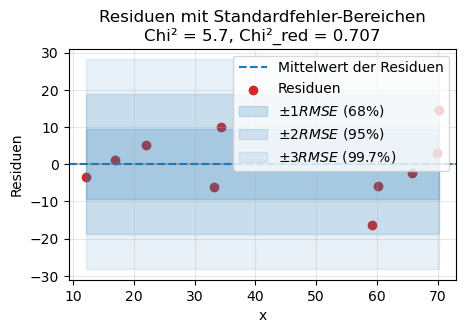

In [94]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10
plt.figure(figsize=(5,3)) # Plot-Größe

# Schätzung des Fehlers für y:
y_err = 0.2 * y  # Beispiel: 20% Fehler in y
# Chi^2 und reduced Chi^2 berechnen
chi2_val = np.sum((residuals / y_err)**2)
dof = len(y) - 2  # Beispiel: lineares Modell mit 2 Parametern
chi2_red = chi2_val / dof

print('Standardfehler des Residuen RMSE: \t +-', sy)
print("Standardabweichung der Residuen: \t +-", np.std(residuals))
print(f"Chi²: {chi2_val:.2f}, Chi²_red: {chi2_red:.3f}")

# Residuenplot
plt.axhline(0, color="tab:gray", linestyle="-", alpha=0.5)
plt.axhline(np.mean(residuals), color="tab:blue", linestyle="--", label='Mittelwert der Residuen')
plt.scatter(x, residuals, color='tab:red', label="Residuen")

# Konfidenzbereiche als Flächen
plt.fill_between(x, -sy, sy, color='tab:blue', alpha=0.2, label=r'$\pm 1 RMSE$ (68%)')
plt.fill_between(x, -2*sy, 2*sy, color='tab:blue', alpha=0.15, label=r'$\pm 2 RMSE$ (95%)')
plt.fill_between(x, -3*sy, 3*sy, color='tab:blue', alpha=0.1, label=r'$\pm 3 RMSE$ (99.7%)')

# Achsenbeschriftungen und Titel
plt.xlabel("x")
plt.ylabel("Residuen")
plt.title(f"Residuen mit Standardfehler-Bereichen\nChi² = {chi2_val:.1f}, Chi²_red = {chi2_red:.3f}")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.show()

### Bestimmtheitsmaß R^2

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Bestimmtheitsmaß Regression berechnen & interpretieren 📚 einfach erklärt [Theorie/Formel] (Alles Andy)

<iframe width="200" height="113" src="https://www.youtube.com/embed/3JR95ubOuL4?si=SpqKGVuZUWvKJBvS" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

Das Bestimmtheitsmaß $R^2$ ist ein Maß für die **Anpassungsgüte** eines Regressionsmodells und gibt an, wie viel Varianz der Daten durch das Modell erklärt werden können:

$$
R^2 = 1 - \frac{SSR}{SST} = 1-\frac{\displaystyle\sum_i \left(y_i - f({x}_i)\right)^2}{\displaystyle\sum_i \left(y_i - \overline{y}\right)^2}
$$

- SSR: Sum of Squared Residuals (deutsch: SQR Summe Quadrierter Residuen)
- SST: um of Squares Total (deutsch: SQT gesamte Quadratsumme)

Allgemein gilt für das **Bestimmtheitsmaß**:

- Je näher $\mathit{R}^2$ an 1 liegt, desto besser passt die Kurvenanpassung.
- Für $\mathit{R}^2 = 0$ ist das Modell völlig ungeeignet, um einen Zusammenhang zwischen $x_i$ und $y_i$ vorherzusagen.
- Für $\mathit{R}^2 = 1$ kann $y$ vollständig durch das lineare Modell beschrieben werden, und alle Messpunkte liegen auf einer nicht-horizontalen Geraden. In diesem Fall besteht ein deterministischer Zusammenhang, kein stochastischer.

**Nachteile des Bestimmtheitsmaßes:**

Bei einer steigenden Anzahl von Messwerten erhöht sich $\mathit{R}^2$, ohne dass die Korrelation oder das Modell tatsächlich besser werden. Dieses Problem könnte durch ein korrigiertes $\mathit{R}^2$ behoben werden:

$$\mathit{\overline R}^2 = 1 - (1 - \mathit{R}^2) \cdot \frac{N-1}{N-k-1}$$

Dabei stehen:
- $N$ für die Anzahl der Messwerte und
- $k$ für die Anzahl der Variablen im Regressionsmodell.

Ein weiterer Nachteil ist, dass das Bestimmtheitsmaß keine Aussage darüber trifft, ob das verwendete Regressionsmodell tatsächlich korrekt ist.

Standardfehler des Residuen RMSE: 	 +- 9.410166067161393
Standardabweichung der Residuen: 	 +- 8.416708402293889
Chi²: 5.66, Chi²_red: 0.707
R² (Bestimmtheitsmaß): 0.942
R²_reduziert (reduziert): 0.925


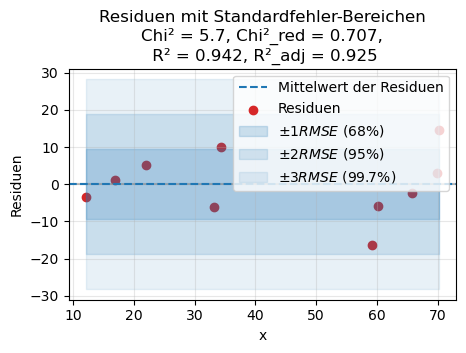

In [180]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10
plt.figure(figsize=(5,3)) # Plot-Größe

# Schätzung des Fehlers für y:
y_err = 0.2 * y  # Beispiel: 20% Fehler in y

# Chi^2 und reduced Chi^2 berechnen
chi2_val = np.sum((residuals / y_err)**2)
dof = len(y) - 2  # Beispiel: lineares Modell mit 2 Parametern
chi2_red = chi2_val / dof

# Bestimmtheitsmaß R² und Adjusted R²
N = len(y)       # Anzahl Datenpunkte
p = 2            # Anzahl Modellparameter (z.B. lineares Modell mit Steigung+Achsenabschnitt)

sst = np.sum((y - np.mean(y))**2)  # totale Varianz
ssr = np.sum(residuals**2)         # Residuensumme
r2 = 1 - ssr/sst
r2_korr = 1 - (1-r2) * (N-1)/(N-p-1)

print('Standardfehler des Residuen RMSE: \t +-', sy)
print("Standardabweichung der Residuen: \t +-", np.std(residuals))
print(f"Chi²: {chi2_val:.2f}, Chi²_red: {chi2_red:.3f}")
print(f"R² (Bestimmtheitsmaß): {r2:.3f}")
print(f"R²_reduziert (reduziert): {r2_korr:.3f}")

# Residuenplot
plt.axhline(0, color="tab:gray", linestyle="-", alpha=0.5)
plt.axhline(np.mean(residuals), color="tab:blue", linestyle="--", label='Mittelwert der Residuen')
plt.scatter(x, residuals, color='tab:red', label="Residuen")

# Konfidenzbereiche als Flächen
plt.fill_between(x, -sy, sy, color='tab:blue', alpha=0.2, label=r'$\pm 1 RMSE$ (68%)')
plt.fill_between(x, -2*sy, 2*sy, color='tab:blue', alpha=0.15, label=r'$\pm 2 RMSE$ (95%)')
plt.fill_between(x, -3*sy, 3*sy, color='tab:blue', alpha=0.1, label=r'$\pm 3 RMSE$ (99.7%)')

# Achsenbeschriftungen und Titel mit Kennwerten
plt.xlabel("x")
plt.ylabel("Residuen")
plt.title(
    f"Residuen mit Standardfehler-Bereichen\n"
    f"Chi² = {chi2_val:.1f}, Chi²_red = {chi2_red:.3f},\n "
    f"R² = {r2:.3f}, R²_adj = {r2_korr:.3f}"
)
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.show()

Das Bestimmtheitsmaß ist gleich dem **Korrelationskoeffizienten**,

 $$\mathit{R}^2 = r^2 (= \textrm{Korrelation}^2)$$

 mit 

 $$r = \frac{\overline{x\cdot y} - \overline x \cdot \overline y}{\sqrt{\overline{x^2} - (\overline x)^2} \cdot {\sqrt{\overline{y^2} - (\overline y)^2}}} $$  

und kann daher recht einfach über numpy-Pakete in Python ausgegeben werden:

In [96]:
# Analytische Methode:
r = (np.mean(x*y)-np.mean(x)*np.mean(y))/(np.sqrt(np.mean(x**2) - np.mean(x)**2) * np.sqrt(np.mean(y**2) - np.mean(y)**2))
print('Der Korrelationskoeffizient zwischen x und t beträgt: %5.8f\n'%(r))

# Python:
r = np.corrcoef(x, y)
print('Die Korrelationsmatrix zwischen x und t mittels numpy-Paket lautet:')
print(r)

Der Korrelationskoeffizient zwischen x und t beträgt: 0.97035603

Die Korrelationsmatrix zwischen x und t mittels numpy-Paket lautet:
[[1.         0.97035603]
 [0.97035603 1.        ]]


### Zusammenfassung

| Maß          | Deutsch                      | Formel/Definition                                       | Wann sinnvoll?                                     | Interpretation |
|--------------|------------------------------|---------------------------------------------------------|---------------------------------------------------|----------------|
| **Residuen** | Residuen                     | $ r_i = y_i - \hat{y}_i $                               | Immer – visuelle Analyse von Fehlern              | Musterfrei um 0 → gutes Modell |
| **SSR**      | Residuensumme                | $ SSR = \sum r_i^2 $                                    | Erste Bewertung, einfache Fits                    | Klein = gute Anpassung, aber abhängig von $N$ |
| **RMSE**     | Standardfehler der Residuen  | $ RMSE = \sqrt{SSR / \nu} $                             | Vergleich von Modellen ohne Fehlerbalken          | Klein = gute Anpassung, vergleichbar |
| **Chi²**     | Chi-Quadrat-Wert             | $ \chi^2 = \sum \left(\tfrac{r_i}{s_i}\right)^2 $       | Wenn Unsicherheiten $s_i$ bekannt sind            | Erwartung: $\chi^2 \approx \nu$ |
| **Chi²_red** | Reduziertes Chi-Quadrat      | $ \chi^2_\text{red} = \chi^2 / \nu $                    | Standardmaß in Physik \& Messtechnik              | $\approx 1$: gute Anpassung, $\ll 1$: Fehler überschätzt, $\gg 1$: schlechtes Modell |
| **R²**       | Bestimmtheitsmaß             | $ R^2 = 1 - \tfrac{SSR}{SST} $                          | Statistik, Machine Learning                       | 0–1: erklärt Varianz, kann Overfitting belohnen |
| **Korr. R²**  | Koffigiertes Bestimmtheitsmaß | $ R^2_\text{korr.} = 1 - (1-R^2)\tfrac{N-1}{N-p-1} $      | Vergleich von Modellen mit unterschiedlicher Param.-zahl | Strenger als $R^2$, bestraft unnötige Parameter |

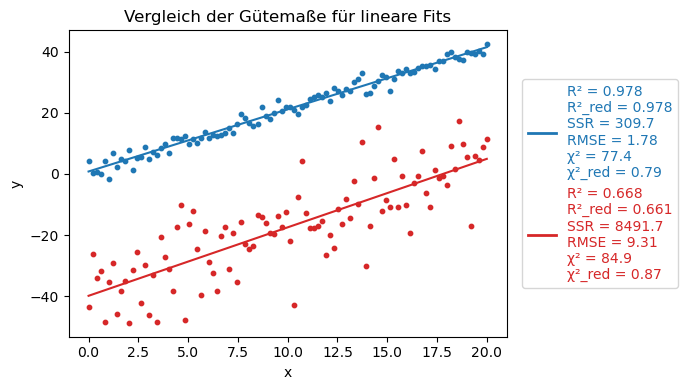

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from matplotlib.lines import Line2D

# MatplotLib Settings:
plt.style.use('default')
plt.rcParams['font.size'] = 10
plt.figure(figsize=(7,4))  # breiter für Legende rechts

# --- Lineares Modell ---
def linear(x, a, b):
    return a * x + b

# --- Daten erzeugen ---
np.random.seed(1)
x1 = np.linspace(0, 20, 100)
n = len(x1)
p = 2
dof = n - p

# Datensatz 1: geringes Rauschen (blau, oben)
noise1 = 2.0
y1 = 2.0 * x1 + 1.0 + np.random.normal(0, noise1, size=n)
params1, _ = curve_fit(linear, x1, y1)
y1_fit = linear(x1, *params1)
resid1 = y1 - y1_fit

SSR1 = np.sum(resid1**2)
RMSE1 = np.sqrt(SSR1/dof)
R2_1 = r2_score(y1, y1_fit)
R2_adj_1 = 1 - (1-R2_1)*(n-1)/(n-p-1)
chi2_1 = np.sum((resid1/noise1)**2)
chi2_red_1 = chi2_1/dof

# Datensatz 2: starkes Rauschen (rot, unten, Offset)
noise2 = 10.0
y2 = 2.0 * x1 + 1.0 + np.random.normal(0, noise2, size=n) - 40
params2, _ = curve_fit(linear, x1, y2)
y2_fit = linear(x1, *params2)
resid2 = y2 - y2_fit

SSR2 = np.sum(resid2**2)
RMSE2 = np.sqrt(SSR2/dof)
R2_2 = r2_score(y2, y2_fit)
R2_adj_2 = 1 - (1-R2_2)*(n-1)/(n-p-1)
chi2_2 = np.sum((resid2/noise2)**2)
chi2_red_2 = chi2_2/dof

# --- Plot ---
plt.scatter(x1, y1, color='tab:blue', s=10)
plt.plot(x1, y1_fit, "-", color='tab:blue')
plt.scatter(x1, y2, color='tab:red', s=10)
plt.plot(x1, y2_fit, "-", color='tab:red')

# Legenden-Text vorbereiten (mit farbigem Labeltext)
legend_text1 = (f"R² = {R2_1:.3f}\n"
                f"R²_red = {R2_adj_1:.3f}\n"
                f"SSR = {SSR1:.1f}\n"
                f"RMSE = {RMSE1:.2f}\n"
                f"χ² = {chi2_1:.1f}\n"
                f"χ²_red = {chi2_red_1:.2f}")

legend_text2 = (f"R² = {R2_2:.3f}\n"
                f"R²_red = {R2_adj_2:.3f}\n"
                f"SSR = {SSR2:.1f}\n"
                f"RMSE = {RMSE2:.2f}\n"
                f"χ² = {chi2_2:.1f}\n"
                f"χ²_red = {chi2_red_2:.2f}")

# Dummy-Handles für farbige Legende
handles = [
    Line2D([0], [0], color='tab:blue', lw=2, label=legend_text1),
    Line2D([0], [0], color='tab:red', lw=2, label=legend_text2)
]

# Achsenbeschriftungen und Legende
plt.xlabel("x")
plt.ylabel("y")
plt.title("Vergleich der Gütemaße für lineare Fits")
leg = plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=True)

# Legendentext einfärben
for text, color in zip(leg.get_texts(), ['tab:blue', 'tab:red']):
    text.set_color(color)

plt.tight_layout()
plt.show()

## Unsicherheiten der Modellparameter

Die Unsicherheiten der Modellparameter können sowohl manuell also auch in python berechnet werden. 


### Manuelle Berechnung (lineare Regression)
Für das einfache lineare Modell $y = a x + b$ lassen sich die Unsicherheiten der Parameter $a$ (Steigung) und $b$ (Ordinatenabschnitt) analytisch angeben. Sie hängen vom **Standardfehler der Residuen** $s_y$ und der Verteilung der Messwerte $x_i$ ab:

Der Fehler der Geradensteigung $b$ beträgt:

$$
\begin{align*}
s_b &= s_y \cdot \sqrt{\frac{N}{N\cdot \sum x_i^2 - \left(\sum x_i\right)^2}} = s_y \cdot \sqrt{\frac{1}{\sum x_i^2 - N\cdot \bar x^2}} \\
& = s_y \cdot \sqrt{\frac{1}{\sum \left(x_i - \bar x \right)^2}} = s_y \cdot \sqrt{\frac{1}{N\cdot (\overline{x^2} - (\overline x)^2)}}
\end{align*}$$

Der Fehler des Ordinatenabschnitts $a$ beträgt:

$$
\begin{align*}
s_a &= s_y \cdot \sqrt{\frac{\sum x_i^2}{N\cdot \sum x_i^2 - \left(\sum x_i\right)^2}} = s_y \cdot \sqrt{\frac{1}{N}\frac{\sum x_i^2}{\sum x_i^2 - N\cdot \bar x^2}} \\
& = s_y \cdot \sqrt{\frac{1}{N}\frac{\sum x_i^2}{\sum \left(x_i - \bar x \right)^2}} = s_b \cdot \sqrt{\overline{x^2}}
\end{align*}$$

Wobei $s_y$ der Standardfehler ist.

Mithilfe dieser Standardabweichungen für $a$ und $b$ können mit der Student-t-Verteilung und Quantilen kombiniert werden, um den Vertrauensbereich anzugeben.

Diese Formeln sind aber nur für lineare Modelle in geschlossener Form praktikabel.

In [181]:
#Manuelle Berechnung der Unsicherheiten der Modellparameter

N = len(y)

# Berechnung von SSR:
SSR = 0
for i in range(N):
    SSR += ( y[i] - b * x[i] - a )**2

varianz_y = 1/(N-2)*SSR
s_y = np.sqrt(varianz_y)


print('Die Unsicherheit von y ist \t s_y = %5.4f' %(s_y))

s_b = s_y * np.sqrt(1 / (N*(np.mean(x**2) - np.mean(x)**2)))
print('Die Unsicherheit von b ist \t s_b = %5.4f' %(s_b))

s_a = s_b * np.sqrt(np.mean(x**2))
print('Die Unsicherheit von a ist \t s_a = %5.4f' %(s_a))

Die Unsicherheit von y ist 	 s_y = 9.4102
Die Unsicherheit von b ist 	 s_b = 0.1367
Die Unsicherheit von a ist 	 s_a = 6.7574



### Kovarianzmatrix
Für beliebige nichtlineare Modelle wird die Berechnung der Unsicherheiten schnell komplex.  
Im Allgemeinen gilt:

- Man benötigt die **Jacobi-Matrix** $J$ der partiellen Ableitungen der Modellfunktion nach den Parametern.  
- Die **Kovarianzmatrix** ergibt sich (unter Annahme gleicher Varianz $\sigma^2$ der Messungen) zu:
$$
C = \sigma^2 \, (J^T J)^{-1}
$$
- Auf der **Diagonale** von $C$ stehen die Varianzen der einzelnen Parameter, ihre Wurzeln sind die Standardabweichungen (Unsicherheiten).  
- Die **Nicht-Diagonalelemente** beschreiben die Kovarianzen und damit die Korrelationen zwischen den Parametern und deren Abhängigkeiten untereinander.

**Kovarianz** $C = \mathrm{cov}(a,b)$ beschreibt, wie stark die Parameter $a$ und $b$ gemeinsam variieren.  
Daraus ergibt sich die **Korrelation**:  
$$
  r_{ab} = \frac{\mathrm{cov}(a,b)}{\sigma_a \, \sigma_b}
$$

- $r_{ab} \approx 0$: Parameter nahezu unabhängig.  
- $r_{ab} \approx +1$: Parameter schwanken gemeinsam.  
- $r_{ab} \approx -1$: Parameter sind stark gegensätzlich gekoppelt.  

Die Kovarianzmatrix fasst damit alle Fehlerinformationen der Parameter in einer Matrix zusammen.  
In der Praxis liest man meist nur die Standardabweichungen (Diagonale) aus, während die Off-Diagonale für starke Parameterkorrelationen relevant ist.
Dieser Weg ist analytisch für komplizierte Modelle meist nicht mehr sinnvoll. 

Python übernimmt in `scipy.optimize.curve_fit` diese Schritte automatisch. Die Unsicherheiten der Modellparameter werden im Folgenden Code ausgegeben, welche sich auf der Diagonale von $C$ befinden:

In [182]:
# Unsicherheiten = sqrt(Diagonale der Kovarianzmatrix)
perr = np.sqrt(np.diag(pcov))
s_a, s_b = perr

# Modellparameter:
a = popt[0]
b = popt[1]

print('Die Kovarianzmatrix des Modells lautet: \n', pcov)

print('\nAuf den Diagonalelementen stehen die Varianzen der Modellparameter:')
print('Varianz von a: \t\t var_a = %5.4f' %(pcov[0,0]))
print('Varianz von b: \t\t var_b = %5.4f' %(pcov[1,1]))
print('Unsicherheit von a: \t s_a = sqrt(var_a) = %5.4f' %np.sqrt(pcov[0,0]))
print('Unsicherheit von b: \t s_b = sqrt(var_b) = %5.4f' %np.sqrt(pcov[1,1]))

print('\nDie Modellparameter inkl. Unsicherheiten lauten:')

print(f"a = {a:.3f} ± {s_a:.3f}")
print(f"b = {b:.3f} ± {s_b:.3f}")


Die Kovarianzmatrix des Modells lautet: 
 [[ 4.56630726e+01 -8.29194564e-01]
 [-8.29194564e-01  1.86797595e-02]]

Auf den Diagonalelementen stehen die Varianzen der Modellparameter:
Varianz von a: 		 var_a = 45.6631
Varianz von b: 		 var_b = 0.0187
Unsicherheit von a: 	 s_a = sqrt(var_a) = 6.7574
Unsicherheit von b: 	 s_b = sqrt(var_b) = 0.1367

Die Modellparameter inkl. Unsicherheiten lauten:
a = -3.498 ± 6.757
b = 1.552 ± 0.137


Um zu überprüfen ob wirklich keine Korrelationen und Abhängigkeiten zwischen den Modellparametern existieren lohnt sich ein weiterer Blick auf die Nicht-Diagonalelement:

In [183]:
# Korrelation zwischen a und b:
cov_ab = pcov[0, 1]
corr_ab = cov_ab / (s_a * s_b)


print('Die Kovarianzmatrix des Modells lautet: \n', pcov)
print('\nKovarianz zwischen a und b: \t cov_ab = %5.4f' %(cov_ab))
print('Korrelation zwischen a und b: \t r_ab = %5.4f' %(corr_ab))


Die Kovarianzmatrix des Modells lautet: 
 [[ 4.56630726e+01 -8.29194564e-01]
 [-8.29194564e-01  1.86797595e-02]]

Kovarianz zwischen a und b: 	 cov_ab = -0.8292
Korrelation zwischen a und b: 	 r_ab = -0.8978


In der Praxis gilt:

- Für die Angabe von $a \pm s_a$ und $b \pm s_b$ reicht meist die Diagonale.  
- Für die Unsicherheit einer Vorhersage $y(x) = ax+b$ muss die Kovarianz berücksichtigt werden, wie bei der [Fehlerfortpflanzung](https://kisleif.github.io/mtbook/content/1_Fehlerfortpflanzung.html) für abhängige Variablen.

Eine starke Korrelation (z. B. $r_{ab} \approx -0.9$) bedeutet, dass die Parameter nicht unabhängig bestimmt werden können und die Unsicherheit des Modells nur korrekt beschrieben werden kann, wenn die Kovarianz einbezogen wird.

Im obigen Beispiel haben wir eine eine Kovarianz $cov_{ab} = -0,8292$ und einen Korrelationskoeffizienten $r_{ab} = -0,898$. Die Parameter Steigung $b$ und Achsenabschnitt $a$ sind stark negativ korreliert: Wenn die Schätzung für $b$ größer wird, wird $a$ tendenziell kleiner – und umgekehrt.
D.h. die Unsicherheiten der beiden Parameter sind nicht unabhängig. Ignoriert man die Kovarianz, unterschätzt oder überschätzt man die Unsicherheit der Modellvorhersage.


```{seealso}
Ein Beispiel zum Auswerten von NASA-Klimadatan findest du [hier](https://kisleif.github.io/mtbook/content/T_Plotten.html). 
```